1. import sys: Importa el módulo sys, que proporciona acceso a algunas variables utilizadas o mantenidas por el intérprete de Python y funciones que interactúan con el intérprete.

2. import warnings: Importa el módulo warnings, que permite controlar las advertencias generadas por Python.

3. if not sys.warnoptions: Comprueba si la lista de opciones de advertencia en el módulo `sys` está vacía.

4. warnings.simplefilter('ignore')`: Si la lista de opciones de advertencia está vacía, se configura el filtro de advertencia para ignorar todas las advertencias generadas en el código siguiente. Esto se hace para desactivar las advertencias y evitar que aparezcan en la salida estándar durante la ejecución del código.

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

**Función de códigos**
1. import tensorflow as tf: 

Importa la biblioteca TensorFlow, que se utiliza para la creación y entrenamiento de modelos de aprendizaje automático, incluyendo redes neuronales.

2. import numpy as np: 

Importa la biblioteca NumPy con el alias "np". NumPy proporciona funciones y estructuras de datos para trabajar con arreglos numéricos.

3. import matplotlib.pyplot as plt: 

Importa la biblioteca Matplotlib con el alias "plt", que se utiliza para crear gráficos y visualizaciones.

4. import seaborn as sns: 

Importa la biblioteca Seaborn con el alias "sns", que se utiliza para mejorar la estética de las visualizaciones creadas con Matplotlib.

5. import pandas as pd: 

Importa la biblioteca Pandas con el alias "pd", que se utiliza para trabajar con estructuras de datos tabulares, como DataFrames.

6. from sklearn.preprocessing import MinMaxScaler: 

Importa la clase `MinMaxScaler` del módulo `sklearn.preprocessing`, que se utiliza para realizar escalado de características.

7. from datetime import datetime:

 Importa la clase `datetime` del módulo `datetime` para trabajar con objetos de fecha y hora.

8. from datetime import timedelta: 

Importa la clase `timedelta` del módulo `datetime` para trabajar con diferencias de tiempo.

9. from tqdm import tqdm: 

Importa la función `tqdm` del módulo `tqdm`, que se utiliza para mostrar barras de progreso durante bucles y tareas largas.

10. sns.set(): 

Configura la estética de Seaborn como predeterminada para las visualizaciones.

11. tf.compat.v1.random.set_random_seed(1234): 

Configura una semilla aleatoria para TensorFlow en su versión 1 (compatible con versiones anteriores). Esto se hace para que los resultados sean reproducibles en tareas que involucran aleatoriedad. La semilla es 1234 en este caso.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

**Función de códigos**

1. `df = pd.read_csv('GOOG.csv')`: Este código utiliza la biblioteca Pandas (importada como `pd`) para leer un archivo CSV llamado 'GOOG.csv' y cargar su contenido en un DataFrame de Pandas. Un DataFrame es una estructura de datos tabular que se utiliza comúnmente en análisis de datos.

2. `df.head()`: Este código imprime las primeras filas del DataFrame `df`. El método `.head()` se utiliza para mostrar una vista previa de los datos y, por defecto, muestra las primeras 5 filas. Esto ayuda a obtener una idea inicial de la estructura y el contenido del conjunto de datos.

En resumen, estos códigos se utilizan para cargar un conjunto de datos desde un archivo CSV en un DataFrame de Pandas y mostrar las primeras filas de ese DataFrame para inspeccionar los datos iniciales.

In [5]:
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-17,99.519997,101.769997,99.510002,100.779999,100.779999,23311600
1,2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
2,2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
3,2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
4,2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700


**Función de códigos**

1. `minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32'))`: En este código, se crea una instancia del objeto `MinMaxScaler` de la biblioteca scikit-learn (`sklearn.preprocessing`). Luego, se ajusta este escalador a los datos en la columna de índice 4 (quinta columna) del DataFrame `df`, que se asume que contiene valores numéricos de tipo flotante (por eso se utiliza `astype('float32')`). El objetivo principal del escalador Min-Max es reescalar los datos a un rango entre 0 y 1.

2. `df_log = minmax.transform(df.iloc[:, 4:5].astype('float32'))`: Aquí, se utiliza el escalador Min-Max previamente ajustado para transformar los datos de la columna de índice 4 del DataFrame `df`. Los datos transformados se almacenan en la variable `df_log`. Estos valores transformados están ahora en el rango [0, 1].

3. `df_log = pd.DataFrame(df_log)`: Se crea un nuevo DataFrame de Pandas a partir de los datos transformados en `df_log`. Esto se hace para que los datos estén en un formato más estructurado y sea más fácil trabajar con ellos en análisis posteriores.

4. `df_log.head()`: Este código imprime las primeras filas del DataFrame `df_log` recién creado, lo que proporciona una vista previa de los datos transformados después de aplicar el escalado Min-Max.

In [6]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.297028
1,0.307507
2,0.288610
3,0.292733
4,0.309054


## Split train and test

I will cut the dataset to train and test datasets,

1. Train dataset derived from starting timestamp until last 30 days
2. Test dataset derived from last 30 days until end of the dataset

So we will let the model do forecasting based on last 30 days, and we will going to repeat the experiment for 10 times. You can increase it locally if you want, and tuning parameters will help you by a lot.

**Función de argumentos**

1. `test_size = 30`: Esta línea de código asigna el valor 30 a la variable `test_size`. Este valor representa el tamaño del conjunto de prueba que se utilizará más adelante en el análisis. En este contexto, parece indicar que se utilizarán los últimos 30 puntos de datos del DataFrame.

2. `simulation_size = 10`: Similar al código anterior, esta línea de código asigna el valor 10 a la variable `simulation_size`. La función o propósito de esta variable no se muestra en el fragmento proporcionado.

3. `df_train = df_log.iloc[:-test_size]`: Aquí, se crea un nuevo DataFrame llamado `df_train` utilizando la selección basada en índices en el DataFrame `df_log`. Se seleccionan todas las filas desde el principio hasta el índice `-test_size`. Esto crea un conjunto de entrenamiento que excluye las últimas 30 filas de `df_log`.

4. `df_test = df_log.iloc[-test_size:]`: En este caso, se crea un nuevo DataFrame llamado `df_test` seleccionando las últimas 30 filas de `df_log`. Estas 30 filas formarán el conjunto de prueba.

5. `df.shape, df_train.shape, df_test.shape`: Esta línea de código imprime las dimensiones (número de filas y columnas) de los DataFrames `df`, `df_train`, y `df_test`. Proporciona información sobre el tamaño original del DataFrame `df`, el conjunto de entrenamiento `df_train`, y el conjunto de prueba `df_test`. La salida proporcionada ayudará a comprender las dimensiones de estos conjuntos de datos.

In [7]:
test_size = 30
simulation_size = 10

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df.shape, df_train.shape, df_test.shape

((250, 7), (220, 1), (30, 1))

**Función códigos dentro de la clase `Model` y las funciones auxiliares `calculate_accuracy` y `anchor`:**

1. `class Model:`: Define una clase llamada `Model`, que representa un modelo de red neuronal. Esta clase contiene métodos y atributos para construir y entrenar una red neuronal, así como para realizar predicciones.

2. `def __init__(self, ...)`: El método `__init__` es el constructor de la clase `Model`. Recibe varios parámetros, incluyendo la tasa de aprendizaje (`learning_rate`), el número de capas (`num_layers`), el tamaño de entrada (`size`), el tamaño de las capas ocultas (`size_layer`), el tamaño de salida (`output_size`) y un valor de sesgo (`forget_bias`). En el constructor se configuran las capas de la red neuronal, las entradas y las salidas, y se definen los cálculos y la función de pérdida.

3. `calculate_accuracy(real, predict)`: Esta función calcula la precisión entre los valores reales y los valores predichos. Realiza una transformación de los datos y calcula la diferencia entre ellos, aplicando una fórmula de precisión.

4. `anchor(signal, weight)`: La función `anchor` realiza un suavizado de la señal de entrada utilizando un valor de ponderación (`weight`). Itera a través de la señal y aplica un suavizado exponencial ponderado a los valores para producir una versión suavizada de la señal de entrada.

Estos códigos representan la lógica principal de la construcción del modelo de red neuronal y la evaluación de la precisión de las predicciones. La clase `Model` contiene la estructura y configuración del modelo, mientras que las funciones `calculate_accuracy` y `anchor` son funciones de utilidad para evaluar y preprocesar datos.

In [11]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.GRUCell(size_layer)

        backward_rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        forward_rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop_backward = tf.contrib.rnn.DropoutWrapper(
            backward_rnn_cells, output_keep_prob = forget_bias
        )
        forward_backward = tf.contrib.rnn.DropoutWrapper(
            forward_rnn_cells, output_keep_prob = forget_bias
        )
        self.backward_hidden_layer = tf.placeholder(
            tf.float32, shape = (None, num_layers * size_layer)
        )
        self.forward_hidden_layer = tf.placeholder(
            tf.float32, shape = (None, num_layers * size_layer)
        )
        _, last_state = tf.nn.bidirectional_dynamic_rnn(
            forward_backward,
            drop_backward,
            self.X,
            initial_state_fw = self.forward_hidden_layer,
            initial_state_bw = self.backward_hidden_layer,
            dtype = tf.float32,
        )
        
        with tf.variable_scope('decoder', reuse = False):
            backward_rnn_cells_decoder = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
            )
            forward_rnn_cells_decoder = tf.nn.rnn_cell.MultiRNNCell(
                [lstm_cell(size_layer) for _ in range(num_layers)],
                state_is_tuple = False,
            )
            drop_backward_decoder = tf.contrib.rnn.DropoutWrapper(
            backward_rnn_cells_decoder, output_keep_prob = forget_bias
            )
            forward_backward_decoder = tf.contrib.rnn.DropoutWrapper(
                forward_rnn_cells_decoder, output_keep_prob = forget_bias
            )
            self.outputs, self.last_state = tf.nn.bidirectional_dynamic_rnn(
                forward_backward_decoder, drop_backward_decoder, self.X, 
                initial_state_fw = last_state[0],
                initial_state_bw = last_state[1],
                dtype = tf.float32
            )
        self.outputs = tf.concat(self.outputs, 2)
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

**FUNCIÓN DE CÓDIGOS**

1. `num_layers = 1`: Esta variable establece el número de capas en la red neuronal. En este caso, se utiliza una sola capa oculta en el modelo.

2. `size_layer = 128`: Define el tamaño de las capas ocultas de la red neuronal. Cada capa oculta tendrá 128 unidades neuronales.

3. `timestamp = 5`: Este valor representa el tamaño de los lotes de datos que se utilizan durante el entrenamiento. Se toma un conjunto de 5 pasos de tiempo como entrada a la red neuronal en cada paso de entrenamiento.

4. `epoch = 300`: Indica el número de veces que se recorre todo el conjunto de entrenamiento durante el entrenamiento. El entrenamiento se realiza durante 300 épocas.

5. `dropout_rate = 0.8`: Configura la tasa de abandono (dropout rate) en la red neuronal. El valor de 0.8 significa que se aplica un 80% de abandono en las capas de dropout durante el entrenamiento.

6. `future_day = test_size`: Esta variable se usa para configurar el número de días futuros que se pronosticarán. En este caso, `future_day` se establece en el valor de `test_size`, que se define previamente como 30.

7. `learning_rate = 0.01`: Establece la tasa de aprendizaje, que controla el tamaño de los pasos que se toman al ajustar los pesos de la red durante el proceso de entrenamiento. El valor de 0.01 indica una tasa de aprendizaje de 0.01, que es un valor comúnmente utilizado para controlar la velocidad de convergencia del entrenamiento.

In [12]:
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
future_day = test_size
learning_rate = 0.01

**Función de códigos**

1. `tf.reset_default_graph()`: Restablece el grafo predeterminado de TensorFlow.

2. `modelnn = Model(...)`: Crea una instancia del modelo de red neuronal.

3. `sess = tf.InteractiveSession()`: Inicia una sesión interactiva de TensorFlow.

4. `sess.run(tf.global_variables_initializer())`: Inicializa todas las variables globales del grafo de TensorFlow.

5. `date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()`: Convierte las fechas en la primera columna del DataFrame a objetos de fecha y hora de Pandas y los almacena en una lista.

6. `pbar = tqdm(range(epoch), desc='train loop')`: Crea una barra de progreso para supervisar el entrenamiento.


In [13]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value_forward = np.zeros((1, num_layers * size_layer))
        init_value_backward = np.zeros((1, num_layers * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.backward_hidden_layer: init_value_backward,
                    modelnn.forward_hidden_layer: init_value_forward,
                },
            )        
            init_value_forward = last_state[0]
            init_value_backward = last_state[1]
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value_forward = np.zeros((1, num_layers * size_layer))
    init_value_backward = np.zeros((1, num_layers * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.backward_hidden_layer: init_value_backward,
                modelnn.forward_hidden_layer: init_value_forward,
            },
        )
        init_value_forward = last_state[0]
        init_value_backward = last_state[1]
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.backward_hidden_layer: init_value_backward,
                modelnn.forward_hidden_layer: init_value_forward,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    init_value_forward = last_state[0]
    init_value_backward = last_state[1]
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.backward_hidden_layer: init_value_backward,
                modelnn.forward_hidden_layer: init_value_forward,
            },
        )
        init_value_forward = last_state[0]
        init_value_backward = last_state[1]
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)
    
    return deep_future[-test_size:]

**Función de códigos**

1. `accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) for r in results]`: Calcula la precisión de las predicciones en `results` en comparación con los valores reales. `calculate_accuracy` se aplica a cada elemento en `results` y almacena las precisiones en la lista `accuracies`.

2. `plt.figure(figsize=(15, 5))`: Crea una figura de Matplotlib con un tamaño de 15x5 pulgadas para mostrar gráficos.

3. Bucle para graficar las predicciones en `results`:
   - `for no, r in enumerate(results)`: Itera a través de las predicciones en `results`.
   - `plt.plot(r, label='forecast %d' % (no + 1))`: Grafica cada conjunto de predicciones, etiquetándolos con 'forecast' seguido de un número para distinguirlos.

4. `plt.plot(df['Close'].iloc[-test_size:].values, label='true trend', c='black')`: Grafica la tendencia real (valores de cierre) del DataFrame `df`, usando una línea negra.

5. `plt.legend()`: Agrega una leyenda al gráfico que muestra las etiquetas 'forecast' y 'true trend'.

6. `plt.title('average accuracy: %.4f' % (np.mean(accuracies)))`: Agrega un título al gráfico que muestra la precisión promedio calculada a partir de la lista `accuracies`.

7. `plt.show()`: Muestra el gráfico en la interfaz gráfica.

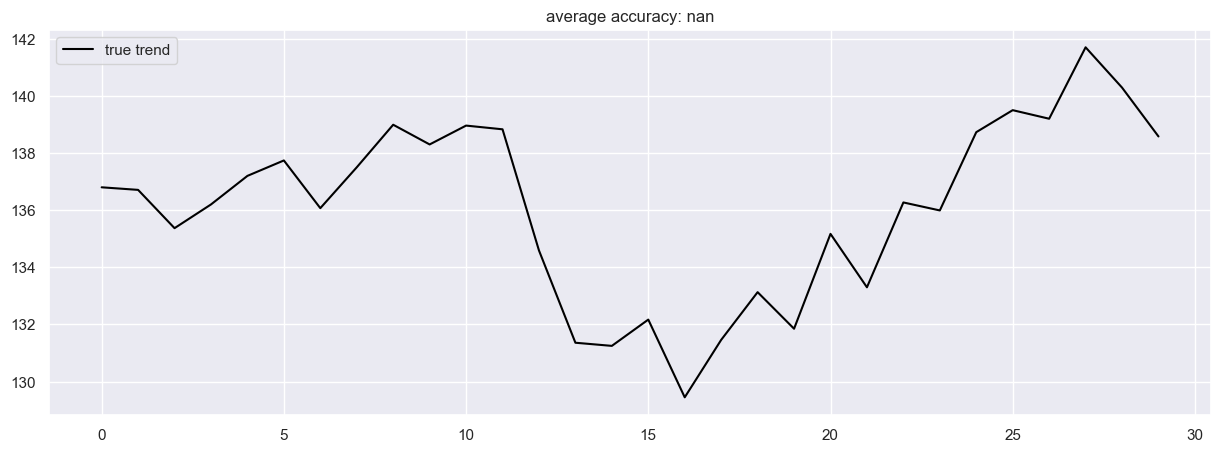

In [38]:
accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()